In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    # check if tx^t * tx is invertible
    xx = np.dot(np.matrix.transpose(tx), tx)
    
    try:
        inv_xx = np.linalg.inv(xx)
    except:
        raise ValueError('Matrix xx is not invertible')
    
    w = np.matrix.dot(np.matrix.dot(inv_xx, np.matrix.transpose(tx)), y)
    loss = compute_cost(y, tx, w)
    
    return loss, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=100)

    # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    loss_LSE, w_star_LSE = least_squares(y, tx)
    
    print('w0, w1 & loss of grid search')
    print(w0_star, w1_star, loss_star)
    print('w0, w1 & loss of LSE')
    print(w_star_LSE, loss_LSE)
          

    return 0

test_your_least_squares()

w0, w1 & loss of grid search
72.7272727273 13.6363636364 15.5587033686
w0, w1 & loss of LSE
[ 73.293922    13.47971243] 15.3858878688


0

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
print(x)
print(y)

[ 0.35237491  4.8951233   1.86662437  3.50706129  3.38087384  0.73093728
  3.88562366  5.65224803  6.28318531  2.37137419  0.60474982  3.63324875
  0.85712473  2.49756165  1.61424946  5.39987312  6.15699785  6.0308104
  0.47856237  2.87612401  4.51656093  0.98331219  1.10949964  0.1
  2.11899928  1.36187455  4.01181111  5.77843549  4.26418602  1.2356871
  2.24518674  1.99281183  1.48806201  4.64274839  4.39037348  3.00231147
  0.22618746  5.27368567  5.02131076  5.52606058  2.6237491   4.76893584
  3.12849893  1.74043692  3.7594362   3.25468638  5.90462294  4.13799857
  2.74993656  5.14749821]
[  8.95549970e-02  -1.28027608e+00   1.28930361e+00  -2.68157012e-01
  -2.06807030e-01   5.38669461e-01  -4.84226326e-01  -1.05814170e+00
   2.22695473e-01   1.94693837e-01   4.37144573e-01  -3.01041920e-01
   4.25144932e-01   3.76102400e-02   8.33364051e-01  -4.37345163e-01
  -1.41108000e-04  -3.08575746e-01   7.22554859e-01  -3.72595292e-01
  -7.37222919e-01   9.51211821e-01   6.05998553e-01   

In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    #create the matrix tx
    tx = np.ones((x.shape[0], degree+1))
    for i in range(x.shape[0]):
        for j in range(degree+1):
            tx[i, j] = np.power(x[i],j)
    return tx
build_poly(x, 2)

array([[  1.00000000e+00,   3.52374910e-01,   1.24168077e-01],
       [  1.00000000e+00,   4.89512330e+00,   2.39622321e+01],
       [  1.00000000e+00,   1.86662437e+00,   3.48428655e+00],
       [  1.00000000e+00,   3.50706129e+00,   1.22994789e+01],
       [  1.00000000e+00,   3.38087384e+00,   1.14303079e+01],
       [  1.00000000e+00,   7.30937276e-01,   5.34269301e-01],
       [  1.00000000e+00,   3.88562366e+00,   1.50980712e+01],
       [  1.00000000e+00,   5.65224803e+00,   3.19479078e+01],
       [  1.00000000e+00,   6.28318531e+00,   3.94784176e+01],
       [  1.00000000e+00,   2.37137419e+00,   5.62341557e+00],
       [  1.00000000e+00,   6.04749821e-01,   3.65722346e-01],
       [  1.00000000e+00,   3.63324875e+00,   1.32004965e+01],
       [  1.00000000e+00,   8.57124731e-01,   7.34662804e-01],
       [  1.00000000e+00,   2.49756165e+00,   6.23781420e+00],
       [  1.00000000e+00,   1.61424946e+00,   2.60580133e+00],
       [  1.00000000e+00,   5.39987312e+00,   2.9158629

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907202
Processing 4th experiment, degree=12, rmse=1.3106193798124994


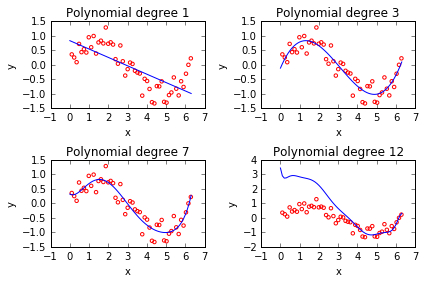

In [16]:
from plots import *
from grid_search import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        tx = build_poly(x, degree)

        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        
        xx = np.dot(np.matrix.transpose(tx), tx)
        xy = np.dot(np.matrix.transpose(tx), y)
        
        weight = np.dot(np.linalg.inv(xx), xy)
        
        a = np.linalg.inv(tx.T @ tx) @ tx.T
        weight = a @ y
        
        mse = compute_cost(y, tx, weight)
        rmse = np.sqrt(2*mse)
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [15]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    index = np.arange(x.shape[0])
    shuffled_index = np.random.permutation(index)
    
    n_train = np.int(x.shape[0] * ratio)
    n_test = x.shape[0] - n_train
    
    shuffled_index_train = shuffled_index[: n_train]
    shuffled_index_test = shuffled_index[n_train : x.shape[0]]
    
    x_train = x[shuffled_index_train]
    y_train = y[shuffled_index_train]
    x_test = x[shuffled_index_test]
    y_test = y[shuffled_index_test]
    
    return x_train, y_train, x_test, y_test

split_data(x, y, 0.8)

(array([ 5.77843549,  3.00231147,  2.6237491 ,  5.02131076,  1.86662437,
         3.50706129,  2.74993656,  1.2356871 ,  5.90462294,  1.99281183,
         1.48806201,  5.52606058,  0.98331219,  0.22618746,  2.87612401,
         3.12849893,  5.14749821,  4.01181111,  1.10949964,  2.49756165,
         4.76893584,  6.0308104 ,  3.25468638,  2.11899928,  0.1       ,
         3.38087384,  4.64274839,  1.61424946,  2.24518674,  0.60474982,
         4.26418602,  3.7594362 ,  4.39037348,  0.47856237,  4.51656093,
         1.36187455,  3.88562366,  5.65224803,  4.13799857,  4.8951233 ]),
 array([-0.56851939, -0.15050841,  0.66750938, -1.30763072,  1.28930361,
        -0.26815701,  0.12187968,  0.99490902, -0.76646743,  0.72778149,
         0.77328884, -0.82651893,  0.95121182,  0.25252451, -0.37259529,
         0.07691219, -1.04670162, -0.55991146,  0.60599855,  0.03761024,
        -0.57230535, -0.30857575,  0.03052242,  0.77707185,  0.35915261,
        -0.20680703, -0.74601164,  0.83336405,  0

Then, test your `split_data` function below.

In [19]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_train = build_poly(x_train, degree)
    poly_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    loss_train, w_train = least_squares(y_train, poly_train)
    loss_test = compute_cost(y_test, poly_test, w_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*loss_train)
    rmse_te = np.sqrt(2*loss_test)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=1.442, Testing RMSE=1.483
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=1.210, Testing RMSE=1.708
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=3.635, Testing RMSE=3.485
proportion=0.1, degree=12, Training RMSE=9.286, Testing RMSE=23.782


# Ridge Regression
Please fill in the function below.

In [24]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    
    # Compute optimal weights
    xx = np.dot(np.transpose(tx),tx)

    bxx = xx + lamb*np.identity(len(xx))

    try:
        inv = np.linalg.inv(bxx)
    except:
        raise ValueError("Matrix X^TX not invertible") 

    xy = np.dot(np.transpose(tx),y)
    w_star = np.dot(inv, xy)
   
    return w_star

In [25]:
def RMSE(y, tx, w):
    # Compute MSE
    e = y - np.dot(tx, w)
    N = len(y)

    L = 1/(2*N)*np.dot(np.transpose(e),e)

    return np.sqrt(2*L)
    

def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************

    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************

    tx_train = build_poly(x_train, degree)
    poly_test = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    
    rmse_tr = []
    rmse_te = []

    for i in range(len(lambdas)):
        w_star = ridge_regression(y_train, tx_train, lambdas[i])

        rmse_tr.append(RMSE(y_train, tx_train, w_star))
        rmse_te.append(RMSE(y_test, tx_test, w_star))

    plt.figure()
    plt.semilogx(lambdas, rmse_tr, 'b*-')
    plt.semilogx(lambdas, rmse_te, 'r*-')
    plt.xlabel('lambda')
    plt.ylabel('RMSE')
    plt.legend(['Train error', 'Test error'], loc=2)
    plt.title('Ridge regression for polynomial degree 7')

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

NameError: name 'tx_train' is not defined